In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [5]:
data=pd.read_csv('/kaggle/input/csgo-round-winner-classification/csgo_round_snapshots.csv')

In [6]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [7]:
np.sum(np.sum(data.isnull()))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0

In [8]:
data.drop(data.select_dtypes(np.number),axis=1)

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


In [9]:
data['bomb_planted']=data['bomb_planted'].astype(np.int16)

In [10]:
encoder=LabelEncoder()
data['map']=encoder.fit_transform(data['map'])
map_mappings={index:label for index,label in enumerate(encoder.classes_)}

In [11]:
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [12]:
data['round_winner']=encoder.fit_transform(data['round_winner'])
round_winner_mapping={index:label for index,label in enumerate(encoder.classes_)}

In [13]:
round_winner_mapping

{0: 'CT', 1: 'T'}

In [14]:
y=data['round_winner']
X=data.drop('round_winner',axis=1)

In [15]:
scaler=RobustScaler()
X=scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.715105,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,-1.291096,-1.136054,-0.112782,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
1,0.545726,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,0.078767,-0.115646,-0.368421,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
2,0.010000,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
3,-0.168575,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
4,0.714837,-0.714286,-0.857143,-0.666667,0.0,0.000000,0.000000,-0.633562,-1.136054,0.966165,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-0.709837,0.714286,1.142857,1.000000,1.0,-2.000000,-1.449438,-0.623288,0.085034,-0.406015,...,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0
122406,0.714480,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,-0.965753,-0.540816,0.451128,...,0.000000,0.333333,0.000000,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
122407,0.178754,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,1.000000,1.000000,0.666667,1.333333,0.5,0.0,0.0,2.0,0.0,0.0
122408,0.000179,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,0.000000,1.333333,-0.333333,0.666667,0.0,0.0,0.0,1.5,0.0,0.0


<Axes: >

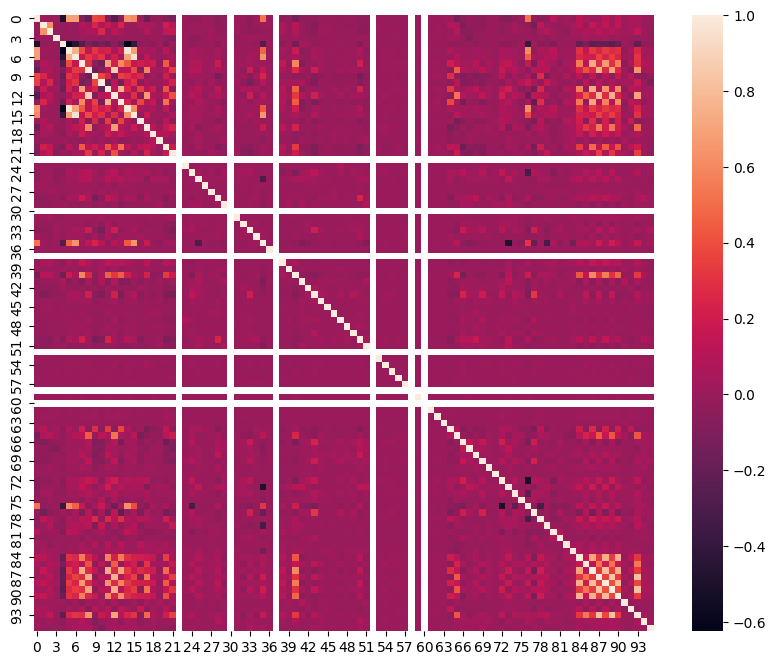

In [16]:
corr=pd.DataFrame(X).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [18]:
pca=PCA(n_components=96)
pca.fit(X)

PCA(n_components=96)

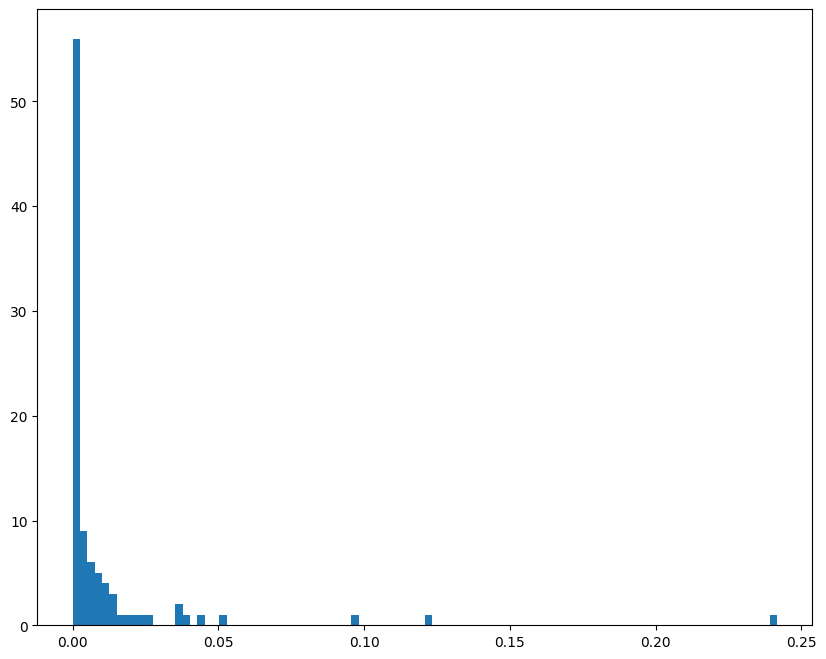

In [19]:
plt.figure(figsize=(10,8))
plt.hist(pca.explained_variance_ratio_,bins=96)
plt.show()

In [20]:
def getcomponents(pca,alpha):
    total_variance=0
    for feature,variance in enumerate(pca.explained_variance_ratio_):
        total_variance+=variance
        if(total_variance>=1-alpha):
            return feature+1
        return len(pca.explained_variance_ratio_)

In [27]:
K=getcomponents(pca,0.2)

In [28]:
X=pca.transform(X)[:,0:K]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.807650,-3.041170,-0.477923,-0.788150,-0.837791,0.305314,-0.571604,-0.640431,0.391012,-0.089662,...,0.000028,0.000012,-2.407901e-05,-9.398937e-05,6.766835e-18,4.101359e-18,-9.230866e-18,8.974352e-17,6.529790e-17,-5.685893e-17
1,0.403354,-2.516566,-0.271932,-1.210600,-0.940974,0.463845,-0.769151,-0.302018,-0.226065,-0.320548,...,0.000212,0.000027,2.677073e-05,2.671646e-05,7.567691e-17,-1.833150e-16,-3.046726e-17,6.196464e-17,4.189079e-17,9.453398e-18
2,1.793312,-1.452247,-0.282613,-1.090443,-0.785376,0.333237,-0.704440,-0.376257,0.147196,-0.330615,...,0.000172,0.000029,9.228359e-06,2.954985e-06,3.353815e-17,-1.440258e-16,-3.426907e-18,3.734535e-17,-1.516113e-17,8.699927e-17
3,1.953921,-1.452769,-0.437852,-1.067899,-0.855280,0.367944,-0.569773,-0.317184,0.120949,-0.332918,...,0.000142,0.000043,4.709488e-06,1.581371e-05,-6.823230e-17,3.732109e-16,-1.187860e-16,2.627148e-16,-1.644738e-18,1.372340e-16
4,0.531003,-3.044842,-0.766788,-0.128865,-0.392524,0.306517,-0.459914,-0.600220,0.627068,-0.421338,...,0.000186,0.000060,-3.233198e-06,-2.800442e-05,-6.101308e-18,-4.607695e-17,-1.148963e-17,1.127850e-16,9.530454e-17,-2.502853e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,2.662008,1.291910,1.542080,0.772222,-0.739458,-0.647647,0.687017,-0.644861,-1.184389,0.700592,...,-0.000112,-0.000024,9.797674e-07,-9.162463e-05,-6.974423e-17,-6.654531e-17,-7.891582e-17,-9.581549e-17,-4.480938e-17,9.682040e-18
122406,-0.110277,-2.209320,0.228796,1.364919,-0.437793,-0.861938,-0.019721,0.045146,-0.401692,0.860939,...,-0.000081,-0.000046,5.343054e-06,-1.001229e-04,-7.628888e-17,-1.198952e-16,-3.267256e-17,4.051490e-17,-1.245790e-16,-4.742129e-17
122407,-2.375611,0.942436,1.160162,-0.669273,1.450319,1.070238,0.582792,0.596464,-1.143166,1.541248,...,0.000424,-0.000032,-5.833478e-05,8.873391e-06,-2.301505e-16,-1.807398e-16,1.310510e-17,-4.416019e-16,-1.789517e-16,-1.728887e-16
122408,-1.905041,0.618990,1.723658,-0.066840,0.992627,1.524162,0.628238,0.485320,-1.258091,1.679712,...,0.000451,-0.000054,-8.548707e-05,-1.958284e-07,-3.229582e-16,-3.056399e-16,-7.652228e-17,-2.802726e-16,-9.105901e-17,-6.362371e-17


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [ ]:
log_model=LogisticRegression(verbose=True)
nn_model=MLPClassifier(verbose=True)

log_model.fit(X_train,y_train)
nn_model.fit(X_train,y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           97     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78785D+04    |proj g|=  3.17095D+04


 This problem is unconstrained.



At iterate   50    f=  4.62178D+04    |proj g|=  8.41526D+01

At iterate  100    f=  4.62103D+04    |proj g|=  4.67334D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   97    100    109      1     0     0   4.673D+01   4.621D+04
  F =   46210.262863248085     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 1, loss = 0.48540630
Iteration 2, loss = 0.44948412
Iteration 3, loss = 0.44146527
Iteration 4, loss = 0.43580620
Iteration 5, loss = 0.43070811
Iteration 6, loss = 0.42670405
Iteration 7, loss = 0.42282261


In [ ]:
print(f"--Logistic Model:{log_model.score(X_test,y_test)}")
print(f"--Neural Net Model:{nn_model.score(X_test,y_test)}")